In [1]:
import pandas as pd
import numpy as np

file = '../../../DATA/OSA_python.xlsx'
data = pd.read_excel(file)
df = pd.DataFrame(data)

In [2]:
df.set_index('Patient', inplace=True)
df.head()

,Gender,IAH,Weight,Height,Age,Cervical,BMI
Patient,,,,,,,
P0002,1,29.6,119,174,56,48.0,0.003931
P0004,1,19.7,78,168,39,42.0,0.002764
P0005,1,9.0,80,173,32,40.0,0.002673
P0006,1,2.0,109,190,32,42.0,0.003019
P0007,1,34.0,86,169,39,42.0,0.003011


In [3]:
#features 
predictors = ['Gender', 'Weight', 'Height', 'Age', 'Cervical', 'BMI']
x = df[predictors].values
y = df['IAH'].values

# Approach 1. only split train test

In [ ]:
from sklearn import model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size= 0.2)

### Fittings (not part of the problem)

In [ ]:
import sklearn
import matplotlib.pyplot as plt

from sklearn import datasets

#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
x, y = datasets.make_regression(n_samples=30, n_features=1, noise=10)

y=y**2
model = LinearRegression().fit(x,y)
plt.figure(figsize=(9, 8))
plt.scatter(x, y)
plt.plot(x,model.predict(x), "g")
plt.show()

In [ ]:
#DECISION TREE
from sklearn.tree import DecisionTreeRegressor
x_test= np.linspace(x.min(),x.max(), 100)[:, np.newaxis]

model = DecisionTreeRegressor().fit(x,y)
plt.figure(figsize=(9, 8))
plt.scatter(x, y)
plt.plot(x_test ,model.predict(x_test), "g")
plt.show()

In [ ]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100).fit(x,y)
plt.figure(figsize=(9, 8))
plt.scatter(x, y)
plt.plot(x_test ,model.predict(x_test), "g")
plt.show()

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=5).fit(x,y)
plt.figure(figsize=(9, 8))
plt.scatter(x, y)
plt.plot(x_test ,model.predict(x_test), "g")
plt.show()

# Approach 1. Only split train test

In [4]:
from sklearn import model_selection
from sklearn import linear_model

import matplotlib.pyplot as plt
from sklearn.metrics import  mean_absolute_error, mean_squared_error, max_error, r2_score


x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size= 0.2)


In [6]:
from sklearn.linear_model import LinearRegression
model_linear = linear_model.LinearRegression().fit(x_train,y_train)

y_out_linear = model_linear.predict(x_test)

mse_lin_1 = mean_squared_error(y_test, y_out_linear)
rmse_lin_1 =  mean_squared_error(y_test, y_out_linear, squared=False)
mae_lin_1 = mean_absolute_error(y_test, y_out_linear)
r2_lin_1 = r2_score(y_test, y_out_linear)

print("MSE: ",mse_lin_1)
print("RMSE: ",rmse_lin_1)
print("MAE: ",mae_lin_1)
print("R2 score: ",r2_lin_1)


MSE:  194.19262501189115
RMSE:  13.935301396521396
MAE:  10.801251134373404
R2 score:  0.29234519088434296


In [5]:
from sklearn.tree import DecisionTreeRegressor
model_tree = DecisionTreeRegressor().fit(x_train, y_train)

y_out_tree = model_tree.predict(x_test)

mse_tree_1 = mean_squared_error(y_test, y_out_tree)
rmse_tree_1 =  mean_squared_error(y_test, y_out_tree, squared=False)
mae_tree_1 = mean_absolute_error(y_test, y_out_tree)
r2_tree_1 = r2_score(y_test, y_out_tree)

print("MSE: ",mse_tree_1)
print("RMSE: ",rmse_tree_1)
print("MAE: ",mae_tree_1)
print("R2 score: ",r2_tree_1)

MSE:  416.617716535433
RMSE:  20.411215459531874
MAE:  15.566141732283462
R2 score:  -0.518191180798085


In [7]:
from sklearn.ensemble import RandomForestRegressor

model_forest = RandomForestRegressor().fit(x_train, y_train)

y_out_forest = model_forest.predict(x_test)

mse_for_1 = mean_squared_error(y_test, y_out_forest)
rmse_for_1 =  mean_squared_error(y_test, y_out_forest, squared=False)
mae_for_1 = mean_absolute_error(y_test, y_out_forest)
r2_for_1 = r2_score(y_test, y_out_forest)
print("MSE: ",mse_for_1)
print("RMSE: ",rmse_for_1)
print("MAE: ",mae_for_1)
print("R2 score: ",r2_for_1)


MSE:  231.52712083496064
RMSE:  15.21601527453757
MAE:  11.925078740157483
R2 score:  0.15629504215451484


In [8]:
from sklearn.neighbors import KNeighborsRegressor

model_knn = KNeighborsRegressor().fit(x_train, y_train)

y_out_knn = model_knn.predict(x_test)

mse_knn_1 = mean_squared_error(y_test, y_out_knn)
rmse_knn_1 =  mean_squared_error(y_test, y_out_knn, squared=False)
mae_knn_1 = mean_absolute_error(y_test, y_out_knn)
r2_knn_1 = r2_score(y_test, y_out_knn)
print("MSE: ",mse_knn_1)
print("RMSE: ",rmse_knn_1)
print("MAE: ",mae_knn_1)
print("R2 score: ",r2_knn_1)

MSE:  253.2133888503937
RMSE:  15.912680127822393
MAE:  12.07143307086614
R2 score:  0.07726839605015035


# Approach 2.  Add cross_val_predict to plot predictios only
## use cross_val_score to use metrics

In [9]:
from sklearn.model_selection import cross_val_predict, cross_val_score

## LINEAR REGRESSION

In [14]:
from sklearn.linear_model import LinearRegression
model_linear = linear_model.LinearRegression().fit(x,y)


In [52]:

mse_lin_2 = cross_val_score(model_linear, x, y, cv = 3, scoring = 'neg_mean_squared_error')
rmse_lin_2 = cross_val_score(model_linear, x, y, cv = 3, scoring = 'neg_root_mean_squared_error')
mae_lin_2 = cross_val_score(model_linear, x, y, cv = 3, scoring = 'neg_mean_absolute_error')
r2_lin_2 = cross_val_score(model_linear, x, y, cv = 3, scoring = 'r2')

print("MSE cross validated: ",abs(mse_lin_2.mean()))
print("RMSE cross validated: ",abs(rmse_lin_2.mean()))
print("MAE cross validated: ",abs(mae_lin_2.mean()))
print("R2 score cross validated: ",r2_lin_2.mean())

MSE cross validated:  273.0133151369417
RMSE cross validated:  16.421166927819595
MAE cross validated:  12.471179662938994
R2 score cross validated:  0.21384429042318578


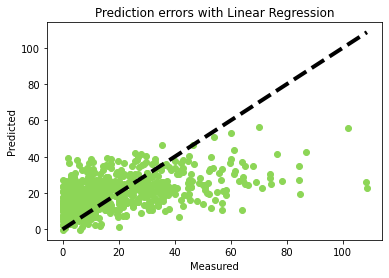

In [15]:
y_out_linear = cross_val_predict(model_linear, x, y, cv = 3) #Para pintar solo
fig, ax = plt.subplots()
ax.scatter(y, y_out_linear, c  = '#8DD657')
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Prediction errors with Linear Regression')
plt.show()



## Decision tree

In [17]:
from sklearn.tree import DecisionTreeRegressor
model_tree = DecisionTreeRegressor().fit(x, y)

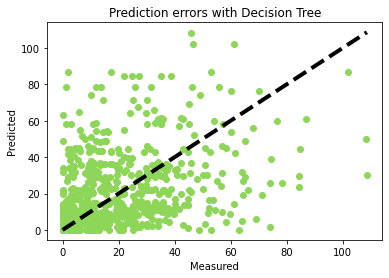

In [18]:
y_out_tree = cross_val_predict(model_tree, x, y, cv = 3)

fig, ax = plt.subplots()
ax.scatter(y, y_out_tree, c  = '#8DD657')
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Prediction errors with Decision Tree')
plt.show()


In [53]:

mse_tree_2 = cross_val_score(model_tree, x, y, cv = 3, scoring = 'neg_mean_squared_error')
rmse_tree_2 = cross_val_score(model_tree, x, y, cv = 3, scoring = 'neg_root_mean_squared_error')
mae_tree_2 = cross_val_score(model_tree, x, y, cv = 3, scoring = 'neg_mean_absolute_error')
r2_tree_2= cross_val_score(model_tree, x, y, cv = 3, scoring = 'r2')

print("MSE cross validated: ",abs(mse_tree_2.mean()))
print("RMSE cross validated: ",abs(rmse_tree_2.mean()))
print("MAE cross validated: ",abs(mae_tree_2.mean()))
print("R2 score cross validated: ",r2_tree_2.mean())

MSE cross validated:  495.83359874511916
RMSE cross validated:  22.59353028401205
MAE cross validated:  16.54097424662434
R2 score cross validated:  -0.5453547962897553


## Random forest

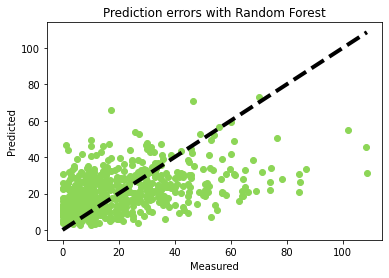

In [20]:
from sklearn.ensemble import RandomForestRegressor

model_forest = RandomForestRegressor().fit(x, y)

y_out_forest = cross_val_predict(model_forest, x, y, cv = 3)

fig, ax = plt.subplots()
ax.scatter(y, y_out_forest, c  = '#8DD657')
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Prediction errors with Random Forest')
plt.show()



In [54]:
mse_for_2 = cross_val_score(model_forest, x, y, cv = 3, scoring = 'neg_mean_squared_error')
rmse_for_2 = cross_val_score(model_forest, x, y, cv = 3, scoring = 'neg_root_mean_squared_error')
mae_for_2 = cross_val_score(model_forest, x, y, cv = 3, scoring = 'neg_mean_absolute_error')
r2_for_2 = cross_val_score(model_forest, x, y, cv = 3, scoring = 'r2')

print("MSE cross validated: ",abs(mse_for_2.mean()))
print("RMSE cross validated: ",abs(rmse_for_2.mean()))
print("MAE cross validated: ",abs(mae_for_2.mean()))
print("R2 score cross validated: ",r2_for_2.mean())

MSE cross validated:  289.3013628265325
RMSE cross validated:  17.094604219102667
MAE cross validated:  12.628055666338787
R2 score cross validated:  0.14361897720161723


## K Nearest Neighbors

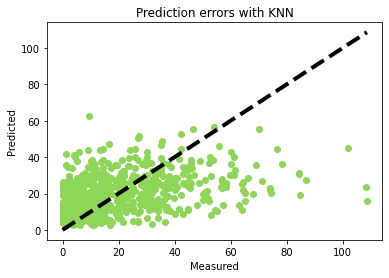

In [22]:
from sklearn.neighbors import KNeighborsRegressor

model_knn = KNeighborsRegressor().fit(x, y)

y_out_knn = cross_val_predict(model_knn, x, y, cv = 3)

fig, ax = plt.subplots()
ax.scatter(y, y_out_knn, c  = '#8DD657')
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Prediction errors with KNN')
plt.show()

In [55]:
mse_knn_2 = cross_val_score(model_knn, x, y, cv = 3, scoring = 'neg_mean_squared_error')
rmse_knn_2 = cross_val_score(model_knn, x, y, cv = 3, scoring = 'neg_root_mean_squared_error')
mae_knn_2 = cross_val_score(model_knn, x, y, cv = 3, scoring = 'neg_mean_absolute_error')
r2_knn_2 = cross_val_score(model_knn, x, y, cv = 3, scoring = 'r2')

print("MSE cross validated: ",abs(mse_knn_2.mean()))
print("RMSE cross validated: ",abs(rmse_knn_2.mean()))
print("MAE cross validated: ",abs(mae_knn_2.mean()))
print("R2 score cross validated: ",r2_knn_2.mean())

MSE cross validated:  315.1508027528689
RMSE cross validated:  17.644022403698045
MAE cross validated:  13.145371397061018
R2 score cross validated:  0.09262158568640984


In [ ]:
results 

In [61]:
results = pd.DataFrame({'Model': ['Linear regresion 1', 'Decision Tree 1', 'Random Forest 1', 'KNN 1', 
                                  'Linear regresion 2', 'Decision Tree 2', 'Random Forest 2', 'KNN 2'],
                        'MSE':   [mse_lin_1, mse_tree_1, mse_for_1, mse_knn_1, 
                                 mse_lin_2.mean(), mse_tree_2.mean(), mse_for_2.mean(), mse_knn_2.mean()],
                        'RMSE': [rmse_lin_1, rmse_tree_1, rmse_for_1, rmse_knn_1,
                                rmse_lin_2.mean(), rmse_tree_2.mean(), rmse_for_2.mean(), rmse_knn_2.mean()],
                        'MAE': [mae_lin_1, mae_tree_1, mae_for_1, mae_knn_1,
                               mae_lin_2.mean(), mae_tree_2.mean(), mae_for_2.mean(), mae_knn_2.mean()],
                        'R2': [r2_lin_1, r2_tree_1, r2_for_1, r2_knn_1,
                              r2_lin_2.mean(), r2_tree_2.mean(), r2_for_2.mean(), r2_knn_2.mean()]})

In [69]:
results2 = pd.DataFrame({'Model': ['Linear regresion 1', 'Decision Tree 1', 'Random Forest 1', 'KNN 1', 
                                  'Linear regresion 2', 'Decision Tree 2', 'Random Forest 2', 'KNN 2'],
                        'MSE':   [mse_lin_1, mse_tree_1, mse_for_1, mse_knn_1, 
                                 abs(mse_lin_2.mean()), abs(mse_tree_2.mean()), abs(mse_for_2.mean()), abs(mse_knn_2.mean())],
                        'RMSE': [rmse_lin_1, rmse_tree_1, rmse_for_1, rmse_knn_1,
                                abs(rmse_lin_2.mean()), abs(rmse_tree_2.mean()), abs(rmse_for_2.mean()), abs(rmse_knn_2.mean())],
                        'MAE': [mae_lin_1, mae_tree_1, mae_for_1, mae_knn_1,
                               abs(mae_lin_2.mean()), abs(mae_tree_2.mean()), abs(mae_for_2.mean()), abs(mae_knn_2.mean())],
                        'R2': [r2_lin_1, r2_tree_1, r2_for_1, r2_knn_1,
                              abs(r2_lin_2.mean()), abs(r2_tree_2.mean()), abs(r2_for_2.mean()), abs(r2_knn_2.mean())]})

In [70]:
results2

,Model,MSE,RMSE,MAE,R2
0,Linear regresion 1,194.192625,13.935301,10.801251,0.292345
1,Decision Tree 1,416.617717,20.411215,15.566142,-0.518191
2,Random Forest 1,231.527121,15.216015,11.925079,0.156295
3,KNN 1,253.213389,15.912680,12.071433,0.077268
4,Linear regresion 2,273.013315,16.421167,12.471180,0.213844
5,Decision Tree 2,495.833599,22.593530,16.540974,0.545355
6,Random Forest 2,289.301363,17.094604,12.628056,0.143619
7,KNN 2,315.150803,17.644022,13.145371,0.092622


# KFold crossvalidation

In [24]:
#imports si no vamos a hacer lo de fittings
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import  mean_absolute_error, mean_squared_error, max_error, r2_score
from sklearn import model_selection
#from sklearn import datasets
from sklearn.model_selection import KFold

In [25]:
#features 
predictors = ['Gender', 'Weight', 'Height', 'Age', 'Cervical', 'BMI']
x = df[predictors].values
y = df['IAH'].values

In [73]:

models = {"Linear Regression 3":LinearRegression(), \
          "Decision Tree 3 ": DecisionTreeRegressor(), \
          "Random Forest 3": RandomForestRegressor(n_estimators=100), \
          "KNN 3": KNeighborsRegressor(n_neighbors=5)}
j=8
for name in models:
    print("Start training models of {}".format(name))
    k = 5
    kf = KFold(n_splits=k)
    precisions = []
    i = 0
    mae_global = []
    mse_global = []
    rmse_global = []
    r2_global = []
    
    for train, test in kf.split(x):
        i+=1
        x_train, x_test = x[train], x[test]
        y_train, y_test = y[train], y[test]
        model = models[name].fit(x_train,y_train)
        y_out = model.predict(x_test)

        mae = mean_absolute_error(y_test, y_out)
        mse = mean_squared_error(y_test, y_out)
        rmse = mean_squared_error(y_test, y_out, squared=False)
        r2 = r2_score(y_test, y_out)
        ...
        
        mae_global.append(mae)
        mse_global.append(mse)
        rmse_global.append(rmse)
        r2_global.append(r2)
        
        results2.loc[j] = [name, np.average(mse_global), np.average(rmse_global), np.average(mae_global), np.average(r2_global)]
        
        print("Iteration {}:mae={:.4f} mse={:.4f} rmse={:.4f} r2={:.4f}".format(i, mae, mse, rmse, r2))
    j+=1
    print("Global: mae={:.4f} mse={:.4f} rmse={:.4f} r2={:.4f}\n".format(np.average(mae_global), np.average(mse_global), np.average(rmse_global), np.average(r2_global)))

Start training models of Linear Regression 3
Iteration 1:mae=11.7069 mse=206.0662 rmse=14.3550 r2=0.3048
Iteration 2:mae=11.3477 mse=196.7352 rmse=14.0262 r2=0.0275
Iteration 3:mae=14.5897 mse=427.4101 rmse=20.6739 r2=0.1889
Iteration 4:mae=11.3326 mse=208.8643 rmse=14.4521 r2=0.1642
Iteration 5:mae=13.4585 mse=335.8650 rmse=18.3266 r2=0.2047
Global: mae=12.4871 mse=274.9882 rmse=16.3668 r2=0.1780

Start training models of Decision Tree 3 
Iteration 1:mae=16.3422 mse=504.5139 rmse=22.4614 r2=-0.7021
Iteration 2:mae=16.0142 mse=463.0076 rmse=21.5176 r2=-1.2888
Iteration 3:mae=15.4299 mse=489.2255 rmse=22.1184 r2=0.0715
Iteration 4:mae=14.8031 mse=435.6487 rmse=20.8722 r2=-0.7432
Iteration 5:mae=18.0157 mse=579.5194 rmse=24.0732 r2=-0.3723
Global: mae=16.1210 mse=494.3830 rmse=22.2086 r2=-0.6070

Start training models of Random Forest 3
Iteration 1:mae=12.0522 mse=237.2646 rmse=15.4034 r2=0.1996
Iteration 2:mae=12.1381 mse=231.1129 rmse=15.2024 r2=-0.1425
Iteration 3:mae=14.2956 mse=398.

In [74]:
results2

,Model,MSE,RMSE,MAE,R2
0,Linear regresion 1,194.192625,13.935301,10.801251,0.292345
1,Decision Tree 1,416.617717,20.411215,15.566142,-0.518191
2,Random Forest 1,231.527121,15.216015,11.925079,0.156295
3,KNN 1,253.213389,15.912680,12.071433,0.077268
4,Linear regresion 2,273.013315,16.421167,12.471180,0.213844
5,Decision Tree 2,495.833599,22.593530,16.540974,0.545355
6,Random Forest 2,289.301363,17.094604,12.628056,0.143619
7,KNN 2,315.150803,17.644022,13.145371,0.092622
8,Linear Regression 3,274.988174,16.366780,12.487079,0.178003
9,Decision Tree 3,494.382998,22.208569,16.121039,-0.606980


([None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 None)

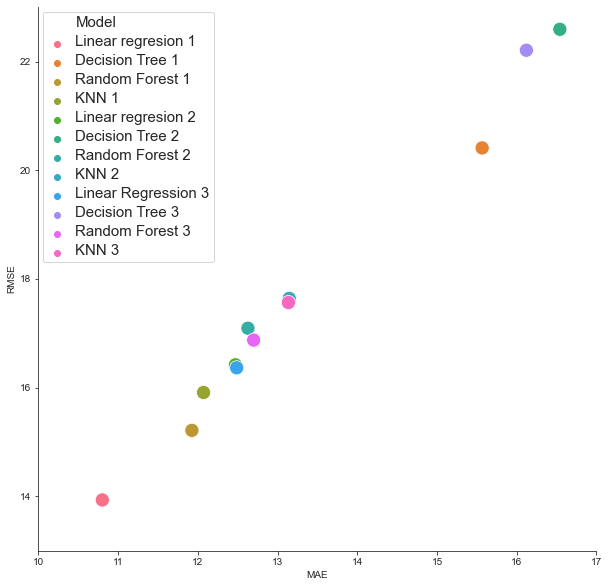

In [97]:
import seaborn as sns
x, y, hue = 'MAE', 'RMSE', 'Model'
#plt.rcParams['figure.figsize']=(10,10)
#sns.set_style("white"), sns.set_style("ticks")
ax = sns.scatterplot(x= x, y=y, data = results2, hue = hue, palette="husl", s=200, legend="brief")
#ax.set_xlabel(x,fontsize=20), ax.set_ylabel(y,fontsize=20) 
ax.set(ylim=(13, 23), xlim=(10,17)) 
plt.setp(ax.get_legend().get_texts(), fontsize='15'), sns.despine()